In [37]:
import astropy.units as u
from astropy.constants import G as _G
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gary.units import galactic
import gary.potential as gp

import biff
G = _G.decompose(galactic).value
from pygadgetreader import *
from octopus import profiles
from astropy import constants
from astropy import units as u

In [39]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Make 2d plots
4. Compare the value of the potential at a given positions

## To take into account:
1. The mass of the MW
2. The scale length
3. The potential units.

In [180]:
# Simulated data:

MW = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pot', 'dm')

MWLMCi = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
MWLMCi_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'mass', 'dm')
MWLMCi_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pot', 'dm')

MWLMCf = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
MWLMCf_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'mass', 'dm')
MWLMCf_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pot', 'dm')




Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential


In [223]:
# Truncated the halo a larger distances
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]
trunc2 = np.where(np.sqrt((MWLMCi[:,0])**2.0 + (MWLMCi[:,1])**2.0 + (MWLMCi[:,2])**2.0)<500)[0]
trunc3 = np.where(np.sqrt((MWLMCf[:,0])**2.0 + (MWLMCf[:,1])**2.0 + (MWLMCf[:,2])**2.0)<500)[0]

In [237]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]


MWLMCi_t = MWLMCi[trunc2]
MWLMCi_mass_t = MWLMCi_mass[trunc2]
MWLMCi_pot_t = MWLMCi_pot[trunc2]


MWLMCf_t = MWLMCf[trunc3]
MWLMCf_mass_t = MWLMCf_mass[trunc3]
MWLMCf_pot_t = MWLMCf_pot[trunc3]


In [184]:
# Hernquist Teo values.

rho_teo = profiles.dens_hernquist(40.85, r, 1.55E12)
pot_teo = profiles.pot_hernquist(40.85, r, 1.55E12)
mass_teo = profiles.mass_hernquist(40.85, r, 1.35E12)

In [43]:
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

# MW isolated halo (Hernquist)

In [167]:
## MW isolated halo 1 term in N

SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.3, 1, 0)
MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1, 1.35E12, 40.85)
MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.35E12, 40.85)


In [264]:
r_MW_t = np.sqrt(MW_t[:,0]**2.0 + MW_t[:,1]**2.0 + MW_t[:,2]**2.0)
rho_teo = profiles.dens_hernquist(40.85, r_MW_t, 1.35E12) 

In [113]:
## MW isolated halo 10 term in N

SMW2, TMW2, nlmsMW2 = STnlm(MW_t, MW_mass_t, 40.3, 10, 0)
MWbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1, 1.35E12, 40.85)
MWbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1.35E12, 40.85)

In [261]:
## MW isolated halo 20 term in N

SMW3, TMW3, nlmsMW3 = STnlm(MW_t, MW_mass_t, 40.3, 20, 0)
MWbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1, 1.35E12, 40.85)
MWbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1.35E12, 40.85)

In [266]:
## MW isolated halo 10 term in Nmax and 5 in lmax

SMW4, TMW4, nlmsMW4 = STnlm(MW_t, MW_mass_t, 40.3, 5, 5)
MWbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1, 1.35E12, 40.85)
MWbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1.35E12, 40.85)

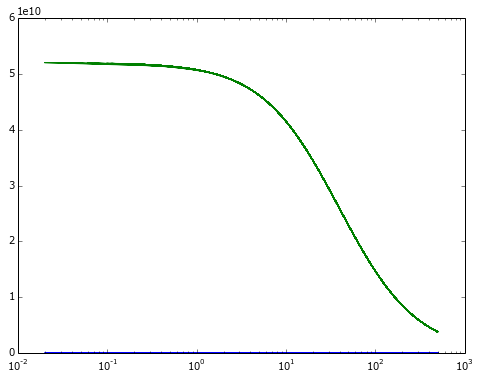

In [172]:
plt.figure(figsize=(8,6))
plt.semilogx(r_MW_t, np.abs(MW_pot_t), label='$N-body$')
plt.semilogx(r_MW_t, np.abs(MWbfe_pot), label='$n_{max} = 1$')

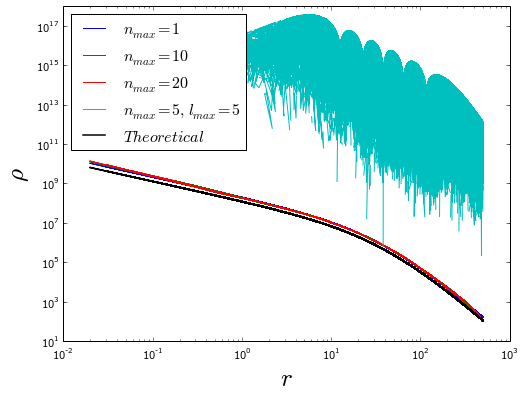

In [268]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
plt.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
plt.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
plt.loglog(r_MW_t, MWbfe_rho4, label='$n_{max} = 5,\ l_{max}=5$')
plt.loglog(r_MW_t, rho_teo, label='$Theoretical$', lw=1.5, c='k')
plt.legend(fontsize=16, loc='best')
plt.xlabel(r'$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)
## There is a factor here!

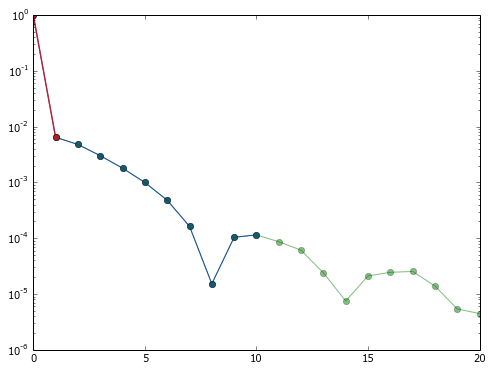

In [145]:
plt.figure(figsize=(8,6))
plt.semilogy(np.array(nlmsMW2)[:,0], np.abs(SMW2.flat/SMW2[0,0,0])[:], marker='o', c='b', alpha=0.8)
plt.semilogy(np.array(nlmsMW3)[:,0], np.abs(SMW3.flat/SMW3[0,0,0])[:], marker='o', c='g', alpha=0.5)
plt.semilogy(np.array(nlmsMW1)[:,0], np.abs(SMW1.flat/SMW1[0,0,0])[:], marker='o', c='r', lw=1.5, alpha=0.6)

#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

# MW + LMC initial state

In [241]:
SMWLMCi1, TMWLMCi1, nlmsMWLMCi1 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 1, 0)

MWLMCbfe_pot = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi1, TMWLMCi1, 1, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi1, TMWLMCi1, 1, 0, 1.35E12, 40.85)

In [248]:
SMWLMCi2, TMWLMCi2, nlmsMWLMCi2 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 10, 0)

MWLMCbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi2, TMWLMCi2, 10, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi2, TMWLMCi2, 10, 0, 1.35E12, 40.85)

In [251]:
SMWLMCi3, TMWLMCi3, nlmsMWLMCi3 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 20, 0)

MWLMCbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi3, TMWLMCi3, 20, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi3, TMWLMCi3, 20, 0, 1.35E12, 40.85)

In [249]:
r_MWLMCi_t = np.sqrt(MWLMCi_t[:,0]**2.0 + MWLMCi_t[:,1]**2.0 + MWLMCi_t[:,2]**2.0)


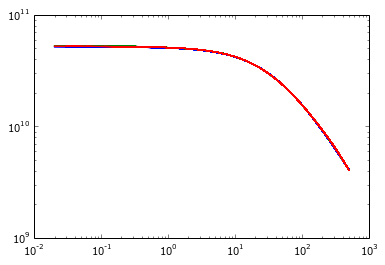

In [256]:
#plt.semilogx(r_MWLMCi_t, MWLMCi_pot_t)
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot2))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot3))

In [257]:
SMWLMCi4, TMWLMCi4, nlmsMWLMCi4 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 20, 5)



In [258]:
MWLMCbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi4, TMWLMCi4, 20, 5, 1, 1.35E12, 40.85)
#MWLMCbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi4, TMWLMCi4, 20, 5, 1.35E12, 40.85)

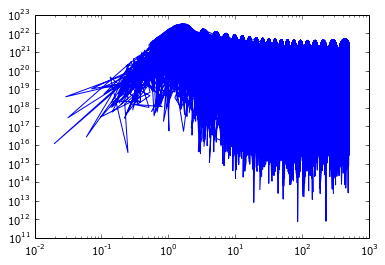

In [259]:
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot4))

In [ ]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
plt.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
plt.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
plt.loglog(r_MW_t, rho_teo, label='$Theoretical$', lw=1.5, c='k')
plt.legend(fontsize=16, loc='best')
plt.xlabel(r'$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)

In [8]:
bfe_dens = biff.density(np.ascontiguousarray(np.double(snap_t)), S, T, 20, 0, 1.55E12, 40.85)

In [45]:
bfe_pot = biff.potential(np.ascontiguousarray(np.double(snap_t)), S, T, 20, 0, 1, 1.35E12, 40.85)
#bfe_pot3 = biff.potential(np.ascontiguousarray(np.double(snap_t3)), S3, T3, 20, 0, G_t2.value, 1.35E12, 40.85)

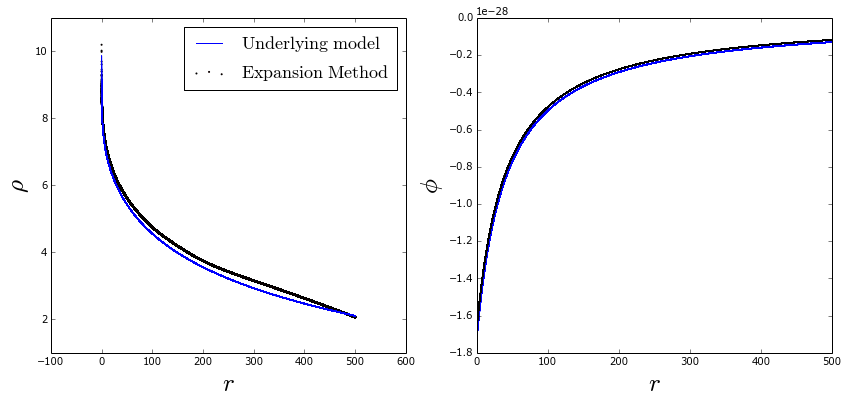

In [63]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r, np.log10(rho_teo), label='$\mathrm{Underlying\ model}$')
plt.scatter(r, np.log10(bfe_dens), c='r', alpha=1, s=1, label='$\mathrm{Expansion\ Method}$')
plt.xlabel('$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)
plt.legend(loc='best', fontsize=18)
plt.subplot(1, 2, 2)
plt.plot(r, (pot_teo))
plt.plot(r, bfe_pot/1.4, c='k', alpha=1) # check this 1.4
plt.xlabel('$r$', fontsize=25)
plt.ylabel(r'$\phi$', fontsize=25)

#plt.savefig('biff_potential_dens.pdf', bbox_inches='tight')

In [46]:
norm_biff_pot = np.max(np.abs(bfe_pot))
norm_pot = np.max(np.abs(pot_t)) /1.48

In [47]:
print norm_biff_pot
print norm_pot

52313394013.2
179275.929054


In [48]:
bfe_pot_norm = bfe_pot/norm_biff_pot
pot_norm = pot_t/norm_pot

ratio_pot = bfe_pot_norm / pot_norm

<matplotlib.colorbar.Colorbar instance at 0x7f28fe850b48>

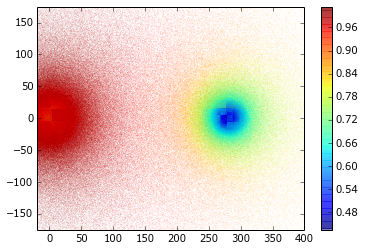

In [66]:
plt.scatter(snap_t[:,1], snap_t[:,2], s=0.1, edgecolors='none', c = ratio_pot, alpha=0.5)
plt.axis('equal')
plt.xlim(-20, 400)
plt.ylim(-80, 80)
plt.colorbar()

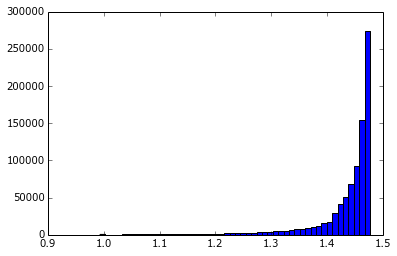

In [24]:
h = plt.hist(ratio_pot, bins=50)

<matplotlib.colorbar.Colorbar instance at 0x7f28f1bf2b00>

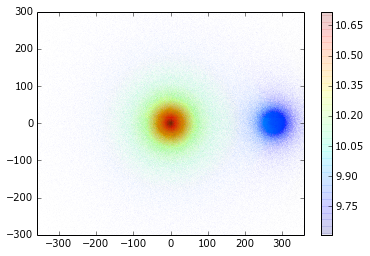

In [68]:
plt.scatter(snap_t[:,1], snap_t[:,2], s=0.1, alpha=0.1, edgecolors='none', c = np.log10(np.abs(bfe_pot)))
plt.axis('equal')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f1ea2c11200>

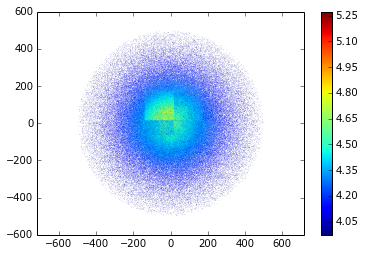

In [85]:
plt.scatter(snap_t[:,1], snap_t[:,2], s=0.1, edgecolors='none', c = np.log10(np.abs(pot_t/1.4)))
plt.axis('equal')
plt.colorbar()


In [83]:
# With more 
S2, T2, nlms = STnlm(snap_t, mass_t, 40.3, 1, 0)
plt.semilogy(np.array(nlms)[:,0], np.abs(S.flat/S[0,0,0])[:], marker='o', c='k')
#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

-3645930153.9212871

In [84]:
max(pot_t)

-13141.59